In [53]:
import random
import numpy as np
import time
import pandas as pd
import os
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from collections import Counter

# k-mean clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator

# change the working

os.chdir("/Users/IggyMac/OneDrive - UvA/2020-2021/Data mining/Github/basic_assignment/assignment_1_task1/Spotify")

# read data

data = pd.read_csv("data/spotify_songs.txt")
print(data.columns)

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='object')


In [56]:
# see how many genres there are in the data
data.groupby("playlist_genre")["playlist_genre"].count()

playlist_genre
edm      6043
latin    5155
pop      5507
r&b      5431
rap      5746
rock     4951
Name: playlist_genre, dtype: int64

In [41]:
# select the features column
features = data[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms']]

In [42]:
# rescale the data
min_max_scaler = preprocessing.MinMaxScaler()
features_scaled = min_max_scaler.fit_transform(features)
df = pd.DataFrame(features_scaled)

## Try clustering with 6 clusters

In [70]:
# Create kmeans with 6 clusters
model = KMeans(n_clusters=15)
# fit model
model.fit(features_scaled)

# Determine the cluster labels of new_points: labels
labels = model.predict(features_scaled)
Counter(labels)

Counter({6: 3847,
         13: 1840,
         2: 3643,
         0: 3612,
         10: 2340,
         1: 2585,
         12: 2310,
         9: 3189,
         8: 2705,
         5: 848,
         4: 1526,
         7: 1188,
         3: 1361,
         14: 1118,
         11: 721})

In [71]:
# join clusters to genres

prediction_dict = {"genre" : list(data.playlist_genre),
                "cluster" : labels}

prediction_df = pd.DataFrame(prediction_dict)

In [72]:
# see if there is any gender domination in the clusters

prediction_df.groupby(["genre", "cluster"]).size()

genre  cluster
edm    0          348
       1          295
       2          801
       3           72
       4           82
                 ... 
rock   10         394
       11          76
       12         323
       13         158
       14          77
Length: 90, dtype: int64

In [73]:
# choose the right number of clusters with the elbow method

kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

max_clusters = 20
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# calculate silhouette coefficients
for k in range(2, max_clusters):
    print(k)
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(features_scaled)
    score = silhouette_score(features_scaled, kmeans.labels_)
    silhouette_coefficients.append(score)

2
3
4
5


KeyboardInterrupt: 

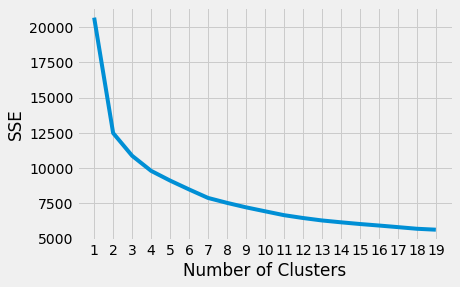

In [45]:
# plot the results

plt.plot(range(1, max_clusters), sse)
plt.xticks(range(1, max_clusters))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [46]:
# locate the elbow
kl = KneeLocator(
    range(1, max_clusters), sse, curve="convex", direction="decreasing"
)

print(kl.elbow)

4
